In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd /content/drive/My Drive/ML/CUAI/Walmart

/content/drive/My Drive/ML/CUAI/Walmart


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA OF THE WALMART DATA

In [4]:
test = pd.read_csv('data/test.csv')
test.tail(5)

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [5]:
train = pd.read_csv('data/train.csv')
train.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
train.groupby('Store').mean()[:5]

,Dept,Weekly_Sales,IsHoliday
Store,,,
1,44.391742,21710.543621,0.070578
2,44.483786,26898.070031,0.070522
3,41.038623,6373.033983,0.070053
4,44.522975,29161.210415,0.070775
5,41.285254,5053.415813,0.071119


In [9]:
store=pd.read_csv("data/stores.csv")
store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
feature=pd.read_csv("data/features.csv")
feature.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# NO MARKDOWN VER

In [0]:
del feature['MarkDown1']
del feature['MarkDown2']
del feature['MarkDown3']
del feature['MarkDown4']
del feature['MarkDown5']

In [14]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [15]:
feature.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821
std,12.987966,18.678607,0.431337,39.738346,1.877259
min,1.000000,-7.290000,2.472000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,132.364839,6.634000
50%,23.000000,60.710000,3.513000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,213.932412,8.567000
max,45.000000,101.950000,4.468000,228.976456,14.313000


## merge

In [16]:
train=pd.merge(train, feature, on=['Store','Date','IsHoliday'])
train=pd.merge(train,store,on="Store")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [17]:
test=pd.merge(test, feature, on=['Store','Date','IsHoliday'])
test=pd.merge(test,store,on="Store")
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315


# 전처리 (0 or 1 coding and NaN 처리)

In [0]:
#IsHoliday True => 0 or 1
train['IsHoliday']=train['IsHoliday'].astype(int)
test['IsHoliday']=test['IsHoliday'].astype(int)

In [0]:
#Type => 0 or 1
#train
Type=list(pd.get_dummies(train['Type']).columns)
train[Type]=pd.get_dummies(train['Type'])
#test
Type=list(pd.get_dummies(test['Type']).columns)
test[Type]=pd.get_dummies(test['Type'])

In [0]:
#month/year column 추가
train['year']=train.Date.astype(str).apply(lambda x: int(x.split("-")[0]))
train['month']=train.Date.astype(str).apply(lambda x: int(x.split("-")[1]))

test['year']=test.Date.astype(str).apply(lambda x: int(x.split("-")[0]))
test['month']=test.Date.astype(str).apply(lambda x: int(x.split("-")[1]))

In [0]:
#month/year column => 0 or 1
#train
year_name=list(pd.get_dummies(train['year']).columns)
month_name=list(pd.get_dummies(train['month']).columns)

train[year_name]=pd.get_dummies(train['year'])
train[month_name]=pd.get_dummies(train['month'])

#test
year_name=list(pd.get_dummies(test['year']).columns)
month_name=list(pd.get_dummies(test['month']).columns)

test[year_name]=pd.get_dummies(test['year'])
test[month_name]=pd.get_dummies(test['month'])

In [22]:
# 위치별로 CPI/Unemployment가 다른 것을 볼수있음! 
#test에 대해서 총 13일이 CPI와 비고용에 대해서 해당 지표가 존재하지 않음

print((train.groupby('Date').median()["CPI"].isnull()).sum())
print((test.groupby('Date').median()["CPI"].isnull()).sum())

print((train.groupby('Date').median()["Unemployment"].isnull()).sum())
print((test.groupby('Date').median()["Unemployment"].isnull()).sum())

0
13
0
13


In [23]:
cpi_day=list(test.groupby('Date').median()[test.groupby('Date').median()["CPI"].isnull()==1].index)  #아에 특정 날짜 이후의 모든 CPI와 Unemployment가 존재하는 것을 볼 수 있게된다.
unemp_day=list(test.groupby('Date').median()[test.groupby('Date').median()["Unemployment"].isnull()==1].index)  #아에 특정 날짜 이후의 모든 CPI와 Unemployment가 존재하는 것을 볼 수 있게된다.

unemp_day

['2013-05-03',
 '2013-05-10',
 '2013-05-17',
 '2013-05-24',
 '2013-05-31',
 '2013-06-07',
 '2013-06-14',
 '2013-06-21',
 '2013-06-28',
 '2013-07-05',
 '2013-07-12',
 '2013-07-19',
 '2013-07-26']

In [0]:
  # 따라서,'2013-05-03'의 바로 이전의 CPI와 unemployment로 nan을 대체하도록한다!
cpi_instead=test[test["Date"]=="2013-04-26"]["CPI"].median()
unemployment_instead=test[test["Date"]=="2013-04-26"]["Unemployment"].median()

In [0]:
test.loc[test["CPI"].isnull(),"CPI"]=cpi_instead
test.loc[test["Unemployment"].isnull(),"Unemployment"]=unemployment_instead

In [26]:
test.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,A,B,C,year,month,2012,2013,1,2,3,4,5,6,7,11,12
115059,45,93,2013-07-26,0,76.06,3.804,193.589304,6.698,B,118221,0,1,0,2013,7,0,1,0,0,0,0,0,0,1,0,0
115060,45,94,2013-07-26,0,76.06,3.804,193.589304,6.698,B,118221,0,1,0,2013,7,0,1,0,0,0,0,0,0,1,0,0
115061,45,95,2013-07-26,0,76.06,3.804,193.589304,6.698,B,118221,0,1,0,2013,7,0,1,0,0,0,0,0,0,1,0,0
115062,45,97,2013-07-26,0,76.06,3.804,193.589304,6.698,B,118221,0,1,0,2013,7,0,1,0,0,0,0,0,0,1,0,0
115063,45,98,2013-07-26,0,76.06,3.804,193.589304,6.698,B,118221,0,1,0,2013,7,0,1,0,0,0,0,0,0,1,0,0


가설: 'month'가 Sale에 영향을 줄까?

  - 새로운 feature로 month 데이터같은 것을 추가해야할지의 여부에 대해서


결론: 월별 차이는 존재하나, year별 차이는 존재하지 않는다.

In [27]:
train.groupby(['month']).mean()['Weekly_Sales']

month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

<BarContainer object of 12 artists>

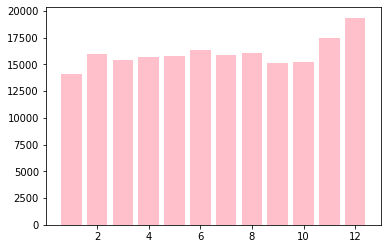

In [28]:
plt.bar(range(1,13),train.groupby(['month']).mean()['Weekly_Sales'],color="pink")

<BarContainer object of 3 artists>

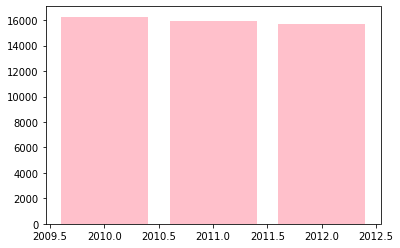

In [29]:
plt.bar(range(2010,2013),train.groupby(['year']).mean()['Weekly_Sales'],color="pink")
#유의미한 차이가 없으므로 year에 대한 데이터는 제외하도록 한다.(사실 어차피 feature로 넣기도 애매한 변수였음)

In [30]:
#분석을하려보니까 test에 8,9,10월에 대한 데이터가 없음!(4분기에 대한 내용으로 바꿔쓰도록 하자.)
#1,2,3
#4,5,6
#7,8,9
#10,11,12

train["qurter1"]=0
train.loc[train[1]==1,"qurter1"]=1
train.loc[train[2]==1,"qurter1"]=1
train.loc[train[3]==1,"qurter1"]=1

train["qurter2"]=0
train.loc[train[4]==1,"qurter2"]=1
train.loc[train[5]==1,"qurter2"]=1
train.loc[train[6]==1,"qurter2"]=1

train["qurter3"]=0
train.loc[train[7]==1,"qurter3"]=1
train.loc[train[8]==1,"qurter3"]=1
train.loc[train[9]==1,"qurter3"]=1

train["qurter4"]=0
train.loc[train[10]==1,"qurter4"]=1
train.loc[train[11]==1,"qurter4"]=1
train.loc[train[12]==1,"qurter4"]=1

train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,A,B,C,year,month,2010,2011,2012,1,2,3,4,5,6,7,8,9,10,11,12,qurter1,qurter2,qurter3,qurter4
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,1,0,0,2010,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106,A,151315,1,0,0,2010,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106,A,151315,1,0,0,2010,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
test["qurter1"]=0
test.loc[test[1]==1,"qurter1"]=1
test.loc[test[2]==1,"qurter1"]=1
test.loc[test[3]==1,"qurter1"]=1

test["qurter2"]=0
test.loc[test[4]==1,"qurter2"]=1
test.loc[test[5]==1,"qurter2"]=1
test.loc[test[6]==1,"qurter2"]=1

test["qurter3"]=0
test.loc[test[7]==1,"qurter3"]=1

test["qurter4"]=0
test.loc[test[11]==1,"qurter4"]=1
test.loc[test[12]==1,"qurter4"]=1

test.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,A,B,C,year,month,2012,2013,1,2,3,4,5,6,7,11,12,qurter1,qurter2,qurter3,qurter4
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,2,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,3,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# 분석: MARKDWON 제외


In [0]:
anlaysis_list=['Store', 'Dept', 'IsHoliday', 'Temperature','Fuel_Price','CPI', 'Unemployment', 'Size','A','B','C',"qurter1","qurter2","qurter3","qurter4" ] #"Date"
target='Weekly_Sales'

In [33]:
train[anlaysis_list]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,A,B,C,qurter1,qurter2,qurter3,qurter4
0,1,1,0,42.31,2.572,211.096358,8.106,151315,1,0,0,1,0,0,0
1,1,2,0,42.31,2.572,211.096358,8.106,151315,1,0,0,1,0,0,0
2,1,3,0,42.31,2.572,211.096358,8.106,151315,1,0,0,1,0,0,0
3,1,4,0,42.31,2.572,211.096358,8.106,151315,1,0,0,1,0,0,0
4,1,5,0,42.31,2.572,211.096358,8.106,151315,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,58.85,3.882,192.308899,8.667,118221,0,1,0,0,0,0,1
421566,45,94,0,58.85,3.882,192.308899,8.667,118221,0,1,0,0,0,0,1
421567,45,95,0,58.85,3.882,192.308899,8.667,118221,0,1,0,0,0,0,1
421568,45,97,0,58.85,3.882,192.308899,8.667,118221,0,1,0,0,0,0,1


In [34]:
test[anlaysis_list]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,A,B,C,qurter1,qurter2,qurter3,qurter4
0,1,1,0,55.32,3.386,223.462779,6.573,151315,1,0,0,0,0,0,1
1,1,2,0,55.32,3.386,223.462779,6.573,151315,1,0,0,0,0,0,1
2,1,3,0,55.32,3.386,223.462779,6.573,151315,1,0,0,0,0,0,1
3,1,4,0,55.32,3.386,223.462779,6.573,151315,1,0,0,0,0,0,1
4,1,5,0,55.32,3.386,223.462779,6.573,151315,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,0,76.06,3.804,193.589304,6.698,118221,0,1,0,0,0,1,0
115060,45,94,0,76.06,3.804,193.589304,6.698,118221,0,1,0,0,0,1,0
115061,45,95,0,76.06,3.804,193.589304,6.698,118221,0,1,0,0,0,1,0
115062,45,97,0,76.06,3.804,193.589304,6.698,118221,0,1,0,0,0,1,0


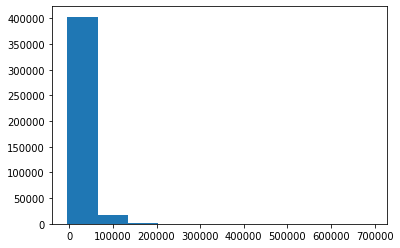

In [35]:
plt.hist(train[target])

plt.show() #매우 치우쳐짐

In [36]:
train[target].describe() #극단치가 존재한다.

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

# 0으로 나눌수없다는 것의 error해결하기!

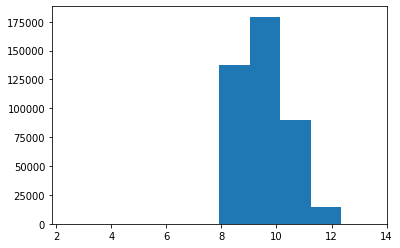

In [37]:
# 적자인 날짜가 존재한다. =>해당것때문에 계산이 잘안된다.(+5000을해준다.(나중에 예측한다음에 최종 결론에서 -5000것을 잊지말자!))
plt.hist(np.log(train[target]+5000))

plt.show() #완벽한 정규분포 형태는 아니어도 아까보다는 정규분포형태에 가까워진것을 확인할 수 있다.

# [이상치 제거 전]본격 분석 다시시작!

In [0]:
X_features=train[anlaysis_list]
y_target=train[target]+5000
y_target_log=np.log(y_target)

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MSE 는 scikit learn의 mean_absolute_error() 로 계산
    mse_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MSE: {2:.3F}'.format(rmsle_val, rmse_val, mse_val))
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.exp(y_test)
        pred = np.exp(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)


from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)


In [40]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.exp(y_test)
        pred = np.exp(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
alpha=[0.01,0.1,1,10]

lr_reg = (0,LinearRegression())

ridge_reg=[]
lasso_reg=[]
for al in alpha:
  ridge_reg.append((al,Ridge(alpha=al)))
  lasso_reg.append((al,Lasso(alpha=al)))

models=[lr_reg]+ridge_reg+lasso_reg

for al,model in models:
    print("\n al= %f )"%(al),end="")
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)


 al= 0.000000 )### LinearRegression ###
RMSLE: 0.780, RMSE: 22809.354, MSE: 13072.119

 al= 0.010000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.354, MSE: 13072.119

 al= 0.100000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.354, MSE: 13072.119

 al= 1.000000 )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.11847e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.11846e-17): result may not be accurate.
  overwrite_a=True).T


### Ridge ###
RMSLE: 0.780, RMSE: 22809.355, MSE: 13072.119

 al= 10.000000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.364, MSE: 13072.118

 al= 0.010000 )### Lasso ###
RMSLE: 0.781, RMSE: 22839.662, MSE: 13078.092

 al= 0.100000 )### Lasso ###
RMSLE: 0.781, RMSE: 22854.133, MSE: 13080.237

 al= 1.000000 )### Lasso ###
RMSLE: 0.783, RMSE: 22956.365, MSE: 13108.679

 al= 10.000000 )### Lasso ###
RMSLE: 0.786, RMSE: 23045.912, MSE: 13127.289


al= 0.000000 )### LinearRegression ###
RMSLE: 0.780, RMSE: 22809.354, MSE: 13072.119

 al= 0.010000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.354, MSE: 13072.119

 al= 0.100000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.354, MSE: 13072.119

 al= 1.000000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.355, MSE: 13072.119

 al= 10.000000 )### Ridge ###
RMSLE: 0.780, RMSE: 22809.364, MSE: 13072.118

 al= 0.010000 )### Lasso ###
RMSLE: 0.781, RMSE: 22839.662, MSE: 13078.092

 al= 0.100000 )### Lasso ###
RMSLE: 0.781, RMSE: 22854.133, MSE: 13080.237

 al= 1.000000 )### Lasso ###
RMSLE: 0.783, RMSE: 22956.365, MSE: 13108.679

 al= 10.000000 )### Lasso ###
RMSLE: 0.786, RMSE: 23045.912, MSE: 13127.289

In [0]:
# OUT OF MEMORY .... I can't.....do...this......

# rf_reg = RandomForestRegressor(n_estimators=100)
# get_model_predict(rf_reg,X_train, X_test, y_train, y_test,is_expm1=True)

In [42]:
gbm_reg = GradientBoostingRegressor(n_estimators=100)
get_model_predict(gbm_reg,X_train, X_test, y_train, y_test,is_expm1=True)

### GradientBoostingRegressor ###
RMSLE: 0.397, RMSE: 13348.132, MSE: 6675.547


In [43]:
xgb_reg = XGBRegressor(n_estimators=100)
get_model_predict(xgb_reg,X_train, X_test, y_train, y_test,is_expm1=True)

[10:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.397, RMSE: 13307.854, MSE: 6658.007


In [44]:
lgbm_reg = LGBMRegressor(n_estimators=100)
get_model_predict(lgbm_reg,X_train, X_test, y_train, y_test,is_expm1=True)

### LGBMRegressor ###
RMSLE: 0.235, RMSE: 8638.219, MSE: 3897.968


# 결론: RF는 MEMORY 때문에 못돌리고 나머지만 돌려봤다. 그결과 lgbm이 가장 성능이 좋았다. =>해당것으로 결과물 제출하자!

In [45]:
lgbm_reg = LGBMRegressor(n_estimators=100)
lgbm_reg.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [46]:
pred=model.predict(test[anlaysis_list])
pred

array([9.62801383, 9.62801383, 9.62801383, ..., 9.4956358 , 9.4956358 ,
       9.4956358 ])

In [61]:
test['Weekly_Sales']=np.exp(pred)+5000
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,A,B,C,year,month,2012,2013,1,2,3,4,5,6,7,11,12,qurter1,qurter2,qurter3,qurter4,Weekly_Sales
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,20184.247623
1,1,2,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,20184.247623
2,1,3,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,20184.247623
3,1,4,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,20184.247623
4,1,5,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,1,0,0,2012,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,20184.247623


In [67]:
test_summary=test[["Store","Dept","Date","Weekly_Sales"]]
test_summary.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2012-11-02,20184.247623
1,1,2,2012-11-02,20184.247623
2,1,3,2012-11-02,20184.247623
3,1,4,2012-11-02,20184.247623
4,1,5,2012-11-02,20184.247623


#submission 예시


In [62]:
sub = pd.read_csv('data/sampleSubmission.csv')
sub.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [64]:
sub["Store"]=sub.Id.astype(str).apply(lambda x: int(x.split("_")[0]))
sub["Dept"]=sub.Id.astype(str).apply(lambda x: int(x.split("_")[1]))
sub["Date"]=sub.Id.astype(str).apply(lambda x: str(x.split("_")[2]))

sub.tail()

,Id,Weekly_Sales,Store,Dept,Date
115059,45_98_2013-06-28,0,45,98,2013-06-28
115060,45_98_2013-07-05,0,45,98,2013-07-05
115061,45_98_2013-07-12,0,45,98,2013-07-12
115062,45_98_2013-07-19,0,45,98,2013-07-19
115063,45_98_2013-07-26,0,45,98,2013-07-26


In [0]:
del sub["Weekly_Sales"]

In [69]:
#같은 Store Dept Date Weekly_Sales를 기준으로 merge
hap=test=pd.merge(sub, test_summary, on=["Store","Dept","Date"])
hap.head()

,Id,Store,Dept,Date,Weekly_Sales
0,1_1_2012-11-02,1,1,2012-11-02,20184.247623
1,1_1_2012-11-09,1,1,2012-11-09,20184.247623
2,1_1_2012-11-16,1,1,2012-11-16,20184.247623
3,1_1_2012-11-23,1,1,2012-11-23,20184.247623
4,1_1_2012-11-30,1,1,2012-11-30,20184.247623


In [70]:
hap.tail()

,Id,Store,Dept,Date,Weekly_Sales
115059,45_98_2013-06-28,45,98,2013-06-28,18301.549406
115060,45_98_2013-07-05,45,98,2013-07-05,18301.549406
115061,45_98_2013-07-12,45,98,2013-07-12,18301.549406
115062,45_98_2013-07-19,45,98,2013-07-19,18301.549406
115063,45_98_2013-07-26,45,98,2013-07-26,18301.549406


In [0]:
submission=hap[["Id","Weekly_Sales"]]

In [0]:
submission.to_csv("data/submission_lgbm_no_markdown.csv",index=False)